# Sea-Ice Detection with Micron Sonar

In [1]:
# import external libraries
import csv
import datetime
import dateutil
import dill
import importlib
import pandas as pd
import plotly.express as px
import math
import numpy as np
import os
import seaborn as sns 
import sys
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# add parent directory to the path for importing modules 
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import micron_reader
import micron_plotter
import MicronEnsemble
import MicronTimeSeries

# use Seaborn settings for plotting 
sns.set()

---
## 0. Reload Modules and Initialize Data Dictionary

In [81]:
def reload_modules():
    importlib.reload(MicronEnsemble)
    importlib.reload(MicronTimeSeries)
    importlib.reload(micron_reader)
    importlib.reload(micron_plotter)

In [82]:
time_series_dict = {}

# open labeled data if not initiated yet 
try:
    labeled_data
except NameError:
    with open('labeled_data', 'rb') as pickle_file:
        labeled_data = dill.load(pickle_file)
        labeled_data
labeled_data

{'Fri_24_Jan_13_34': [('label_ice_category', 0, -180, -4.0, 1.0),
  ('label_ice_presence', 0, -180, -4.0, 1.0),
  ('label_ice_percent', 0, -180, -4.0, 1.0),
  ('label_ice_category', 22, -4.0, 180, 1.0),
  ('label_ice_presence', 1, -4.0, 180, 1.0),
  ('label_ice_percent', 1, -4.0, 180, 1.0),
  ('label_ice_thickness', 6.5, -4.0, 180, 1.0)],
 'Fri_24_Jan_14_30': [('label_ice_category', 10, -180, -2.5, 1.0),
  ('label_ice_presence', 1, -180, -2.5, 1.0),
  ('label_ice_percent', 0.1, -180, -2.5, 1.0),
  ('label_ice_category', 22, -2.5, 180, 1.0),
  ('label_ice_presence', 1, -2.5, 180, 1.0),
  ('label_ice_percent', 1, -2.5, 180, 1.0),
  ('label_ice_thickness', 6.5, -2.5, 180, 1.0)]}

---
## 1. Parse Micron Sonar file

In [148]:
reload_modules()
file_list = [
    "Fri_24_Jan_13_34",
    "Fri_24_Jan_14_30",
    "Fri_24_Jan_14_42",
    "Fri_24_Jan_14_55",
    "Fri_24_Jan_15_08",
    "Fri_24_Jan_15_20",
    "Fri_24_Jan_15_33",
    "Fri_24_Jan_15_50"
]
file     = file_list[0]
ext      = ".CSV"
folder   = "2020-01-24_WHOI-Tank-Sonar-Testing/csv/"
root     = "/Users/zduguid/Dropbox (MIT)/MIT-WHOI/NSF Arctic NNA/Research Activities/"
filepath = "%s%s%s%s" % (root, folder, file, ext)
location = "Woods Hole MA"
date     = (2020, 1, 24)

constant_depth = 0.4

time_series_dict[file] = micron_reader.micron_reader(
    filepath, 
    location=location, 
    date=date,
    bearing_bias=0,
    constant_depth=constant_depth
)

Parsing: Fri_24_Jan_13_34.CSV
  >> Ensembles Parsed:   100
  >> Ensembles Parsed:   200
  >> Ensembles Parsed:   300
  >> Ensembles Parsed:   400
  >> Ensembles Parsed:   500
  >> Ensembles Parsed:   600
  >> Ensembles Parsed:   700
  >> Ensembles Parsed:   800
  >> Ensembles Parsed:   900
  >> Ensembles Parsed:  1000
  >> Ensembles Parsed:  1100
  >> Ensembles Parsed:  1200
  >> Ensembles Parsed:  1300
  >> Ensembles Parsed:  1400
  >> Ensembles Parsed:  1500
  >> Ensembles Parsed:  1600
  >> Ensembles Parsed:  1700
  >> Ensembles Parsed:  1800
  >> Ensembles Parsed:  1900
  >> Ensembles Parsed:  2000
  >> Ensembles Parsed:  2100
  >> Ensembles Parsed:  2200
  >> Ensembles Parsed:  2300
  >> Ensembles Parsed:  2400
  >> Ensembles Parsed:  2500
  >> Finished Parsing!


In [149]:
# save file 
time_series_dict[file].save_as_csv('../csv/')

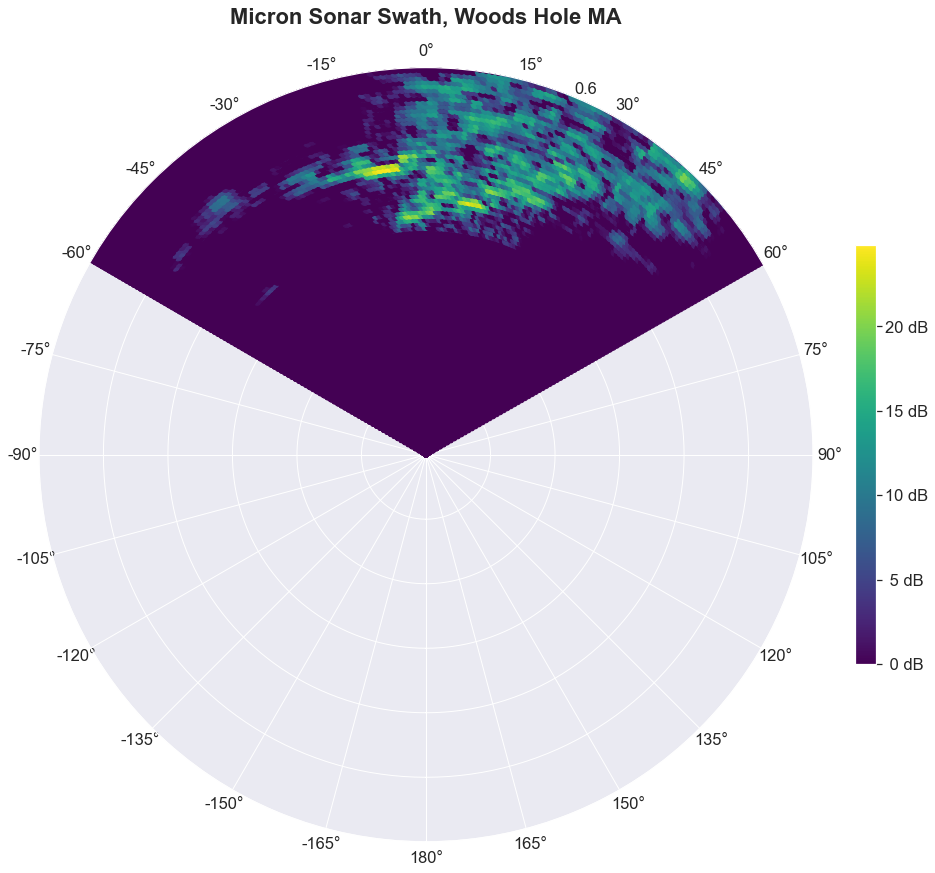

In [159]:
reload_modules()
# open file 
ts = MicronTimeSeries.MicronTimeSeries(name=file)
ts.from_csv('../csv/MicronTimeSeries_Fri_24_Jan_13_34.CSV')

micron_plotter.plot_polar(ts)

In [147]:
tmp = pd.read_csv('../csv/MicronTimeSeries_Fri_24_Jan_13_34.CSV', header=0, index_col=0, parse_dates=True)


var_list = list(tmp.columns)
head_idx = var_list.index('dbytes')+1
ice_idx  = [i for i, s in enumerate(var_list) if s[:5]=='class'][0]
bin_idx  = [i for i, s in enumerate(var_list) if s[:5]=='bin_0'][0]

header_vars    = var_list[         : head_idx]
derived_vars   = var_list[head_idx :  ice_idx]
ice_vars       = var_list[ice_idx  :  bin_idx]
intensity_vars = var_list[bin_idx  :         ]


print(bin_idx)

print(header_vars)
print()
print(derived_vars)
print()
print(ice_vars)
print()
print(intensity_vars)
# print(time_series_dict[file].header_vars)
# header_vars == time_series_dict[file].header_vars

48
['line_header', 'date_time', 'node', 'status', 'hdctrl', 'range_scale', 'gain', 'slope', 'ad_low', 'ad_span', 'left_lim', 'right_lim', 'steps', 'bearing', 'dbytes']

['year', 'month', 'day', 'sonar_depth', 'sonar_altitude', 'bearing_bias', 'bearing_ref_world', 'incidence_angle', 'bin_size', 'intensity_index', 'max_intensity', 'max_intensity_bin', 'max_intensity_norm', 'peak_start_bin', 'peak_start', 'peak_end_bin', 'peak_end', 'peak_width_bin', 'peak_width', 'vertical_range']

['class_ice_category', 'class_ice_presence', 'class_ice_percent', 'class_ice_thickness', 'class_ice_slope', 'class_ice_roughness', 'label_ice_category', 'label_ice_presence', 'label_ice_percent', 'label_ice_thickness', 'label_ice_slope', 'label_ice_roughness', 'label_saltwater_flag']

['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5', 'bin_6', 'bin_7', 'bin_8', 'bin_9', 'bin_10', 'bin_11', 'bin_12', 'bin_13', 'bin_14', 'bin_15', 'bin_16', 'bin_17', 'bin_18', 'bin_19', 'bin_20', 'bin_21', 'bin_22', 'bin_23'

---
## 2. Define Separator and Set Ice Labels Appropriately

In [63]:
def set_labels_and_plot(set_new_labels=False, 
                        make_polar_plot=True, 
                        make_incidence_plot=True):
    reload_modules()
    # playing with separator 
    min_bearing = -180
    max_bearing =  180
    separator   =  -2.5
    pad         =   1.0


    # generate polar plot 
    if make_polar_plot:
        micron_plotter.plot_polar(time_series_dict[file], 
                                  separator=separator, 
                                  pad=pad,
                                  output_file=file+"_polar")


    # hand-annotated labels to add to this data 
    labels = [
        # 'label_saltwater_flag'
        # open water side 
        ('label_ice_category',   10, min_bearing, separator,   pad),
        ('label_ice_presence',    1, min_bearing, separator,   pad),
        ('label_ice_percent',   0.1, min_bearing, separator,   pad),
    #     ('label_ice_category',    0, min_bearing, separator,   pad),
    #     ('label_ice_presence',    0, min_bearing, separator,   pad),
    #     ('label_ice_percent',     0, min_bearing, separator,   pad),
        # ice slab side
        ('label_ice_category',   22, separator,   max_bearing, pad),
        ('label_ice_presence',    1, separator,   max_bearing, pad),
        ('label_ice_percent',     1, separator,   max_bearing, pad),
        ('label_ice_thickness', 6.5, separator,   max_bearing, pad)
    ]


    # reset labels and then add labels listed above
    time_series_dict[file].reset_labels()
    for (var, val, b_min, b_max, pad) in labels:
        time_series_dict[file].set_label_by_bearing(var, val, b_min, b_max, pad)

    # plot incidence vs intensity curve
    if make_incidence_plot:
        micron_plotter.plot_incidence_curves(time_series_dict[file], 
                                             variable_size=False,
                                             output_file=file+"_incidence",
                                             axis_limits=True)

    # add labels to label dictionary 
    if file not in labeled_data:
        labeled_data[file] = labels
    elif set_new_labels:
        labeled_data[file] = labels
    else:
        print("WARNING: cannot set new labeled data for this file")

    max_intensity_norm = np.max(time_series_dict[file].df.max_intensity_norm)
    if max_intensity_norm > 20:
        print("WARNING: some values are not plotting, max norm is: %f" % (max_intensity_norm))

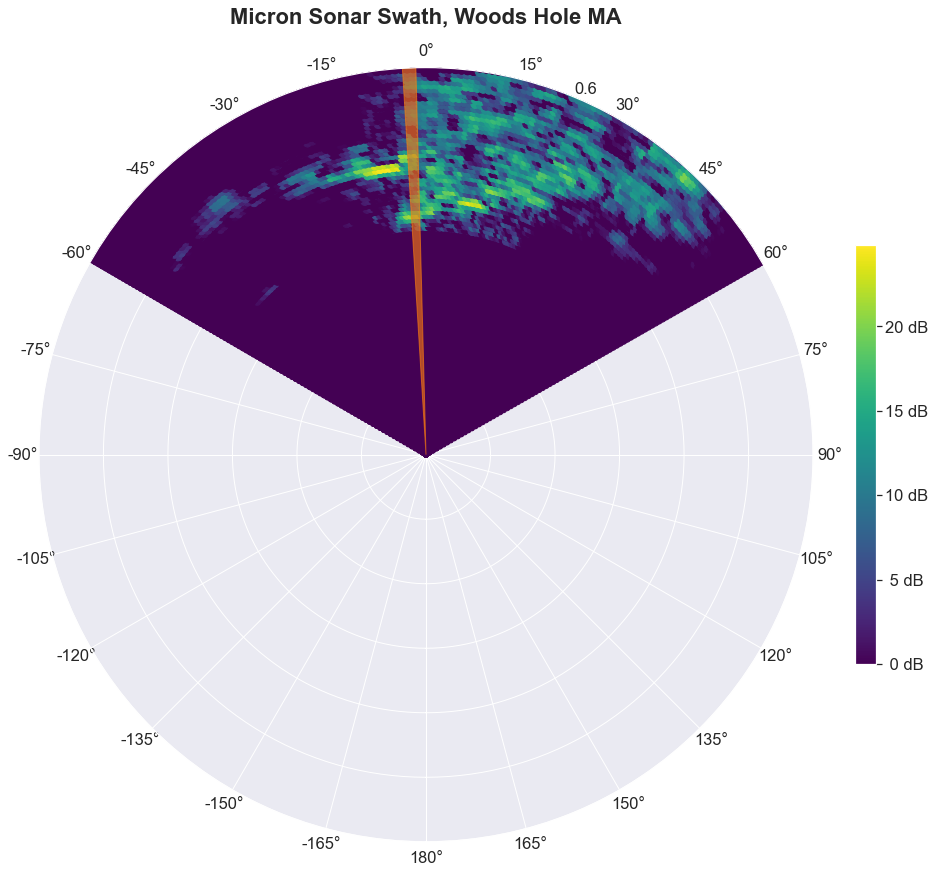

In [68]:
# set_labels_and_plot(set_new_labels=False,
#                     make_polar_plot=True,
#                     make_incidence_plot=True)

set_labels_and_plot(set_new_labels=False,
                    make_polar_plot=True,
                    make_incidence_plot=False)

In [80]:
print(type(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

<class 'str'>


num bins   469
num dbytes 317.0


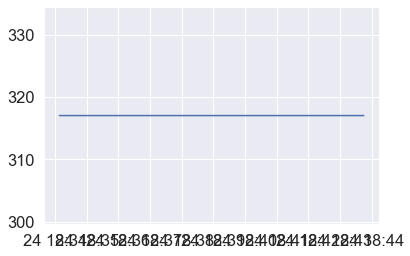

In [76]:
print('num bins  ', len(time_series_dict[file].intensity_vars))
print('num dbytes', time_series_dict[file].df.dbytes[0])

plt.plot(time_series_dict[file].df.dbytes)

---
## 3. Combine Time Series Dictionary 

In [ ]:
# with open('time_series_dict', 'wb') as pickle_file:
#     dill.dump(time_series_dict, pickle_file)
    
# with open('labeled_data', 'wb') as pickle_file:
#     dill.dump(labeled_data, pickle_file)

print(len(time_series_dict))
time_series_dict

---
## 4. Log Labeled Data

In [66]:
labeled_data

{'Fri_24_Jan_13_34': [('label_ice_category', 0, -180, -4.0, 1.0),
  ('label_ice_presence', 0, -180, -4.0, 1.0),
  ('label_ice_percent', 0, -180, -4.0, 1.0),
  ('label_ice_category', 22, -4.0, 180, 1.0),
  ('label_ice_presence', 1, -4.0, 180, 1.0),
  ('label_ice_percent', 1, -4.0, 180, 1.0),
  ('label_ice_thickness', 6.5, -4.0, 180, 1.0)],
 'Fri_24_Jan_14_30': [('label_ice_category', 10, -180, -2.5, 1.0),
  ('label_ice_presence', 1, -180, -2.5, 1.0),
  ('label_ice_percent', 0.1, -180, -2.5, 1.0),
  ('label_ice_category', 22, -2.5, 180, 1.0),
  ('label_ice_presence', 1, -2.5, 180, 1.0),
  ('label_ice_percent', 1, -2.5, 180, 1.0),
  ('label_ice_thickness', 6.5, -2.5, 180, 1.0)]}

---
# RANDOM TESTING

## Micron Beam Cross-Section

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(15,5))

res        = 50
r_min      = 1 
deg_to_rad = np.pi/180

def f(phi,theta):
    return(r_min/np.cos(phi*deg_to_rad)/np.cos(theta*deg_to_rad))

# define the coordinate system of the traced beam
v_angle = 35
h_angle = 3 
v_width = np.linspace(-(v_angle/2), (v_angle/2), res)
h_width = np.linspace(-(h_angle/2), (h_angle/2), res)

# set up meshgrid 
X,Y     = np.meshgrid(v_width,h_width)
Z = np.zeros((res,res))
for i in range(res):
    for j in range(res):
        Z[i,j] = f(X[i,j],Y[i,j])

print(np.max(Z))
print(np.min(Z))
print(np.mean(Z))
print(np.median(Z))
        
img = plt.pcolor(X, Y, Z, cmap='viridis')
fig.colorbar(img)
ax.axis('equal')
ax.set_title('Slant Range Multiplier for Micron Sonar Beam', 
             fontsize=22, fontweight='bold')
ax.set_xlabel('Vertical Angle [deg]')
ax.set_ylabel('Horizontal Angle [deg]')
# plt.savefig("../figs/%s.png" % ('slant-range-multiplier'))

## Normalizing Intensity

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(15,8))

# # normalizing between zero and 1 
# time_series.df['max_intensity']/np.max(time_series.df['max_intensity'])
# time_series.df['max_intensity_norm']/np.max(time_series.df['max_intensity_norm'])

ax.plot(time_series_dict[file].df['bearing'], 
        time_series_dict[file].df['max_intensity'],
        'o', color='tab:blue')

ax.plot(time_series_dict[file].df['bearing'], 
        time_series_dict[file].df['max_intensity_norm'],
        'o', color='tab:purple')

ax.plot(time_series_dict[file].df['bearing'], 
        time_series_dict[file].df['vertical_range']*10,
        'o', color='tab:orange')

ax.set_title('Micron Sonar Time Series: Effect of Normalizing Max Intensity', 
             fontsize=22, fontweight='bold')

plt.axvspan(separator-0.1, separator+0.1, color='k')

ax.set_xlabel('Bearing [deg]')
# ax.set_ylabel('Intensity [dB], Norm Intensity[dB$\cdot$m]')
ax.legend(['Max Intensity [dB]', 
           'Max Intensity Norm [dB$\cdot$m]', 
           'Distance [0.1$\cdot$m]'], loc='best')
# plt.savefig("../figs/%s.png" % ('normalized-intensity6'))

## Three View

In [ ]:

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,figsize=(15,15))
ax[0].plot(time_series.df['bearing_ref_world']-90, time_series.df['peak_start']*np.cos((time_series.df['bearing_ref_world']-90)*np.pi/180), 'o')
ax[0].set_xlabel('Incidence Angle [deg]')
ax[0].set(xlabel='Incidence Angle [deg]')
ax[0].set_xlabel('Peak Width [m]')
ax[1].plot(time_series.df['incidence_angle'], time_series.df['max_intensity']*time_series.df['max_intensity_bin'],'o')
ax[0].set_xlabel('Incidence Angle [deg]')
ax[0].set_xlabel('Max Intensity [db]')
ax[2].plot(time_series.df['max_intensity']/time_series.df['max_intensity_bin'], time_series.df['peak_width'], 'o')
ax[0].set_xlabel('Max Intensity [db]')
ax[0].set_xlabel('Peak Width [m]')
# plt.savefig("../figs/%s.png" % ('tmp2'))

## Computing Ice Thickness 

In [ ]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(time_series.df.bearing_ref_world, time_series.df.peak_start, 'o', color='tab:blue')
plt.plot(time_series.df.bearing_ref_world, time_series.df.vertical_range, 'o', color='tab:orange')

ax.set_title('Micron Sonar Blake Tank Test: Slant Range and Vertical Range', 
             fontsize=22, fontweight='bold')

plt.axvspan(separator-0.1, separator+0.1, color='k')

# water = 0.42
ice   = 0.35962075787747666
std   = 0.02
# plt.axhspan(water-0.001, water+0.001, color='k')
# plt.axhspan(ice-std,     ice+std, color='tab:purple', alpha=0.5)
window = 10

water_edge = time_series.df[(time_series.df.bearing_ref_world > -window) &
                            (time_series.df.bearing_ref_world <  separator)]
ice_edge   = time_series.df[(time_series.df.bearing_ref_world >  separator) &
                            (time_series.df.bearing_ref_world <  window)]

water_dist = np.median(water_edge.vertical_range)
ice_dist   = np.median(ice_edge.vertical_range)
print(water_dist)
print(ice_dist)
print(water_dist-ice_dist)
print()
print(np.std(water_edge.vertical_range))
print(np.std(ice_edge.vertical_range))

plt.plot(water_edge.bearing_ref_world, water_edge.vertical_range, 'o', color='tab:red')
plt.plot(ice_edge.bearing_ref_world, ice_edge.vertical_range, 'o', color='tab:green')
ax.set_xlabel('Bearing [deg]')
ax.set_ylabel('Distance [m]')
ax.legend(['Slant Range [m]', 
           'Vertical Range [m]'], loc='best')
# plt.savefig("../figs/%s.png" % ('ice-thickness-6.5cm'))


## Selecting Ensembles to Plot

In [ ]:
"""
    # store current angle and rounded angle 
    angle_current         = data_array[data_lookup['Bearing']]
    angle_current_rounded = math.floor(angle_current/angle_increment)*angle_increment
    
    # TODO make this a sub-method
    # compute the change in angle since a plot has been generated 
    if (not angle_previous): 
        angle_delta = 0
    else:  
        # add change current angle difference to the running sum since last plot 
        if angle_current - angle_previous > 0:
            angle_delta += angle_current - angle_previous 
        # account for instance where 
        else: 
            angle_delta += angle_current + deg_in_circle - angle_previous 
    
    # update previous angle 
    angle_previous = angle_current 
    
    # generate plot for every 20 degrees, avoid replotting area already plotted
    if ((angle_current_rounded % angle_increment == 0) and 
        (angle_delta > angle_increment/2) and 
        (angle_current_rounded not in angles_plotted) and 
        (plot_on)):
"""
z = 5

## Playing with Bit-Encoding of Micron Data

In [ ]:
int("8923", 16)
int("16", 16)
bin(int("16", 16))
bin(8923)

bin(16971)[2:][::-1]
int('1101001001000010'[::-1],2)

# 8923 hex -> 0b   1000 1001 0010 0011
# 8923 int -> 0b   0010 0010 1101 1011'

# 8967 hex -> 0b   1000 1001 0110 0111
# 8967 int -> 0b   0010 0011 0000 0111'

# 144  hex -> 0b 1 0100 0100
# 144  int -> 0b   1001 0000
# 16   hex -> 0b   0001 0110

# print(header[14], row1[14]) # column 14 is the number of data points in the scanline 
# print(header[15], row1[15]) # column 15 is the first value of an array DBytes long